In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [30]:
portugal = gpd.read_file('shapes/gadm36_PRT_1.shp')
portugal = portugal.drop([1,12])

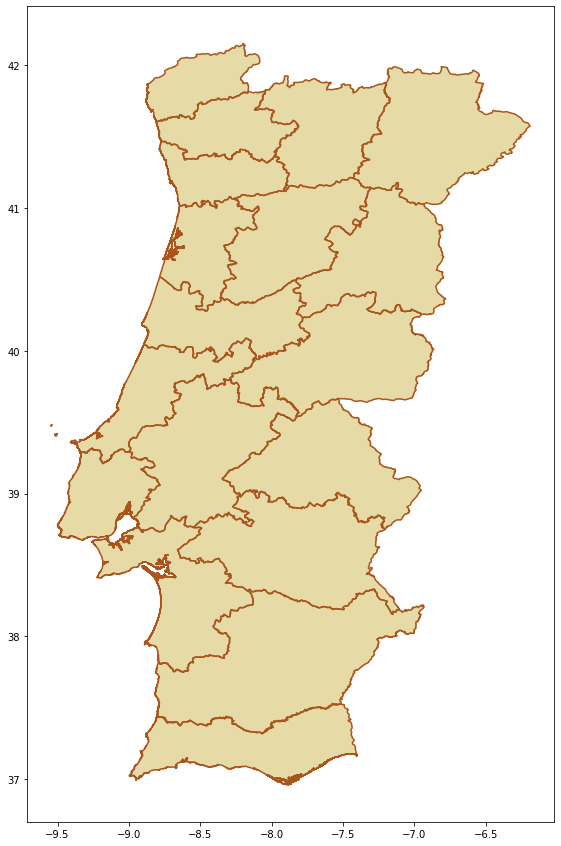

In [3]:
fig,ax = plt.subplots(figsize=(15,15))
portugal.plot(ax = ax, color = 'xkcd:beige')
portugal.boundary.plot(ax = ax, color = 'xkcd:sienna')

In [32]:
df = pd.read_csv('aves2018-GBIF.csv', sep='\t')
crs = {'init': 'epsg:4326'}
#df = df[df.place_state_name != 'Madeira']
#df = df[df.place_state_name != 'Azores']
df.head()

/home/joaoalves/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,14,18,39,40,43,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2108711277,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_POR:OBS571748265,Animalia,Chordata,Aves,Passeriformes,Fringillidae,Serinus,Serinus serinus,...,NaN,NaN,CC0_1_0,NaN,obsr564983,NaN,NaN,2020-02-11T01:51:27.188Z,NaN,COORDINATE_ROUNDED
1,2153921405,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_POR:OBS603740742,Animalia,Chordata,Aves,Passeriformes,Muscicapidae,Phoenicurus,Phoenicurus ochruros,...,NaN,NaN,CC0_1_0,NaN,obsr540331,NaN,NaN,2020-02-11T01:51:40.790Z,NaN,COORDINATE_ROUNDED
2,2181756097,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS626893450,Animalia,Chordata,Aves,Passeriformes,Motacillidae,Motacilla,Motacilla flava,...,NaN,NaN,CC0_1_0,NaN,obsr1039346,NaN,NaN,2020-02-11T01:51:48.287Z,NaN,COORDINATE_ROUNDED
3,2187080709,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS639995725,Animalia,Chordata,Aves,Passeriformes,Fringillidae,Linaria,Linaria cannabina,...,NaN,NaN,CC0_1_0,NaN,obsr518181,NaN,NaN,2020-02-11T01:51:49.977Z,NaN,COORDINATE_ROUNDED
4,2222668464,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS680871694,Animalia,Chordata,Aves,Passeriformes,Fringillidae,Linaria,Linaria cannabina,...,NaN,NaN,CC0_1_0,NaN,obsr278750,NaN,NaN,2020-02-11T01:52:01.759Z,NaN,COORDINATE_ROUNDED


In [34]:
geometry = [Point(xy) for xy in zip(df["decimalLongitude"], df["decimalLatitude"])]
geo_df = gpd.GeoDataFrame(df,
                        crs = crs,
                        geometry = geometry)

geo_df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,geometry
0,2108711277,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_POR:OBS571748265,Animalia,Chordata,Aves,Passeriformes,Fringillidae,Serinus,Serinus serinus,...,NaN,CC0_1_0,NaN,obsr564983,NaN,NaN,2020-02-11T01:51:27.188Z,NaN,COORDINATE_ROUNDED,POINT (-8.09624 38.66165)
1,2153921405,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD_POR:OBS603740742,Animalia,Chordata,Aves,Passeriformes,Muscicapidae,Phoenicurus,Phoenicurus ochruros,...,NaN,CC0_1_0,NaN,obsr540331,NaN,NaN,2020-02-11T01:51:40.790Z,NaN,COORDINATE_ROUNDED,POINT (-8.64251 40.96537)
2,2181756097,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS626893450,Animalia,Chordata,Aves,Passeriformes,Motacillidae,Motacilla,Motacilla flava,...,NaN,CC0_1_0,NaN,obsr1039346,NaN,NaN,2020-02-11T01:51:48.287Z,NaN,COORDINATE_ROUNDED,POINT (-9.03631 38.88314)
3,2187080709,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS639995725,Animalia,Chordata,Aves,Passeriformes,Fringillidae,Linaria,Linaria cannabina,...,NaN,CC0_1_0,NaN,obsr518181,NaN,NaN,2020-02-11T01:51:49.977Z,NaN,COORDINATE_ROUNDED,POINT (-8.88987 39.87592)
4,2222668464,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS680871694,Animalia,Chordata,Aves,Passeriformes,Fringillidae,Linaria,Linaria cannabina,...,NaN,CC0_1_0,NaN,obsr278750,NaN,NaN,2020-02-11T01:52:01.759Z,NaN,COORDINATE_ROUNDED,POINT (-8.96938 37.04864)


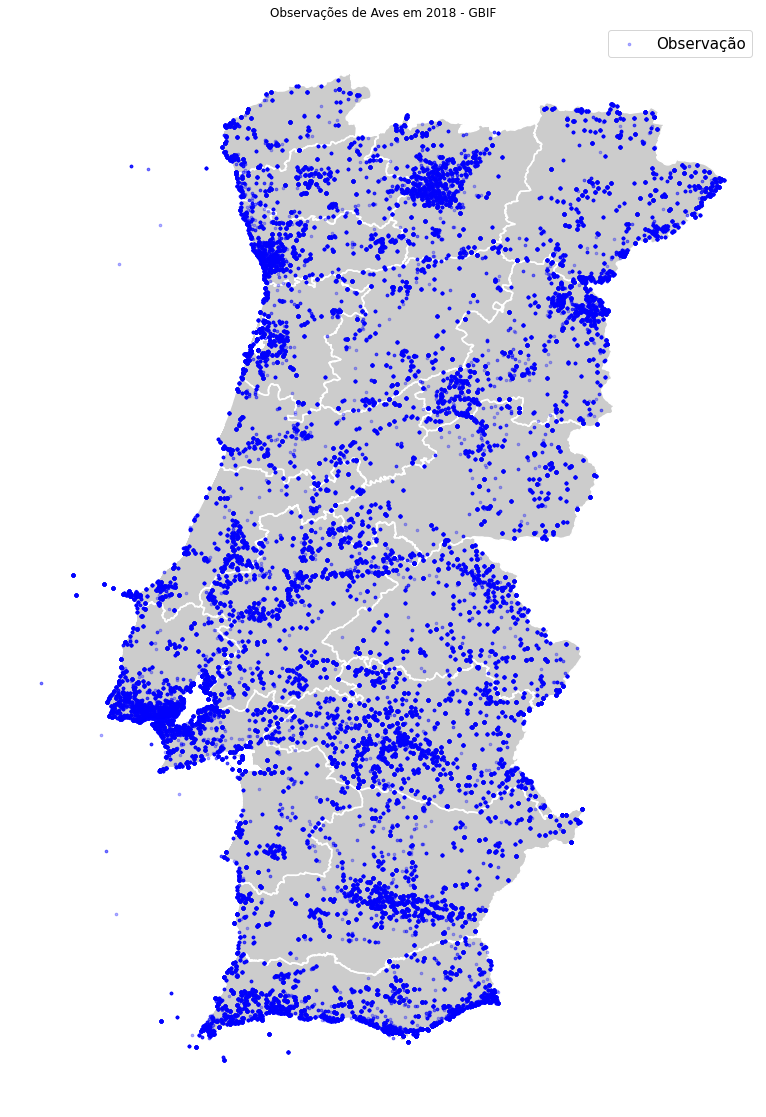

In [37]:
fig,ax = plt.subplots(figsize = (20,20))

portugal.plot(ax = ax, alpha = 0.4, color = 'grey', zorder = 1)
portugal.boundary.plot(ax = ax, color = 'white', zorder = 2)
geo_df.plot(ax=ax, markersize =7, label = 'Observação', color='blue', alpha=0.3, zorder = 3)
plt.legend(prop={'size':15})
plt.title('Observações de Aves em 2018 - GBIF')
plt.axis('off')
plt.savefig('ObsAves2018GBIF.png', bbox_inches='tight')